<a href="https://colab.research.google.com/github/GenoKiller777/AprendizajeSupervisado/blob/main/ParadojasEstad%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción**

La estadística es una parte esencial de la ciencia de datos y nos proporciona varias herramientas y técnicas para analizar y comprender los datos. Sin embargo, a veces los **resultados estadísticos** pueden ser **contradictorios o incluso paradójicos**, lo que genera **confusión y malas interpretaciones**.

Exploraremos **cinco paradojas estadísticas** con las que todo científico de datos debería estar familiarizado.

Explicaremos _qué es cada paradoja, por qué ocurre y cómo evitar las trampas comunes asociadas con ella_.

## **Paradoja de la Accuracy**

La paradoja de la Accuracy se refiere a la situación en la que se puede lograr un alto nivel de Accuracy incluso cuando un modelo no es predictivo. Puede ocurrir cuando hay un desequilibrio en la distribución de clases en el conjunto de datos.

Por ejemplo, considere un conjunto de datos donde el **90%** de las observaciones **pertenecen a una clase** y el **10%** a **otra clase**. Un modelo que predice la clase mayoritaria para todas las observaciones alcanzará una **Accuracy del 90%**, aunque en realidad no esté prediciendo nada.

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score

# crear un conjunto de datos desequilibrado
y_true = np.array([0] * 900 + [1] * 100)
y_pred = np.zeros(1000)

# calcular la precisión
accuracy = accuracy_score(y_true, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9


En este ejemplo, creamos un _conjunto de datos desequilibrado_ con **900 observaciones en una clase** y **100 en otra clase**. Luego creamos un modelo que predice la **clase mayoritaria** (**0**) para todas las observaciones. A pesar de que en realidad no **predice nada**, el modelo logra una **Accuracy** del **90%**.

Un ejemplo del mundo real de la **paradoja de la Accuracy** se puede ver en las pruebas médicas. _Considere una enfermedad rara que afecta solo a **1** de cada **100,000** personas. Si se crea una prueba que tiene una **Accuracy** del **99,9%** para detectar la enfermedad, pero se administra a una población en la que solo el **0,1%** de las personas tiene la enfermedad, la prueba tendrá una **alta tasa** de **Accuracy** del **99,9%**_.

Sin embargo, dará como resultado **una gran cantidad de falsos positivos**, lo que significa que muchas **personas sanas** serán **diagnosticadas incorrectamente con la enfermedad**.

Evaluar tareas de **clasificación** utilizando la **Accuracy** **puede no ser la mejor opción**. La **Precision** y el **Recall** son **mejores alternativas**. Estas métricas están relacionadas con **la paradoja del falso positivo**, que se analizará en la siguiente sección.

## **Paradoja del falso positivo**

La paradoja de los falsos positivos ocurre cuando el **accuracy** de un _modelo_ es **alta** pero la **tasa de falsos positivos** también es **alta**.

En otras palabras, el _modelo_ puede **clasificar** un gran **número de instancias** como **positivas** cuando en **realidad** son **negativas**. _Esta paradoja puede conducir a conclusiones y toma de decisiones incorrectas_.

In [2]:
import pandas as pd
import numpy as np

# Definir variables
normal_count = 9999
fraud_count = 1
false_positives = 499.95
false_negatives = 0

# Calcular precision
precision = fraud_count / (fraud_count + false_positives)
print(f"Precision: {precision:.2f}")

# Calcular recall
recall = fraud_count / (fraud_count + false_negatives)
print(f"Recall: {recall:.2f}")

# Calcular accuracy
true_negatives = normal_count - false_positives
accuracy = (true_negatives + fraud_count) / (normal_count + fraud_count)
print(f"Accuracy: {accuracy:.2f}")


Precision: 0.00
Recall: 1.00
Accuracy: 0.95


_Por ejemplo, imagina un examen médico para una enfermedad que solo afecta al **1%** de la población_.

Si la prueba tiene una **precisión** del **99%**, el **99%** de las veces _identifica correctamente la presencia o ausencia de la enfermedad_.

Sin embargo, si **1000** personas se hacen la prueba, **10** personas darán **positivo** para la _enfermedad_ aunque solo **1** la tenga.

Esto significa que es **más probable** que un **resultado positivo** de la _prueba_ sea un **falso positivo** que un **verdadero positivo**.

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# generar un conjunto de datos de clasificación binaria
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=42)

# dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# entrenar un modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# predecir en el conjunto de prueba y obtener la matriz de confusión
y_pred = model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# calcular la exactitud, la precisión y el recall
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.79
Precision: 0.82
Recall: 0.75


Regresión Logística: ROC AUC= 0.788


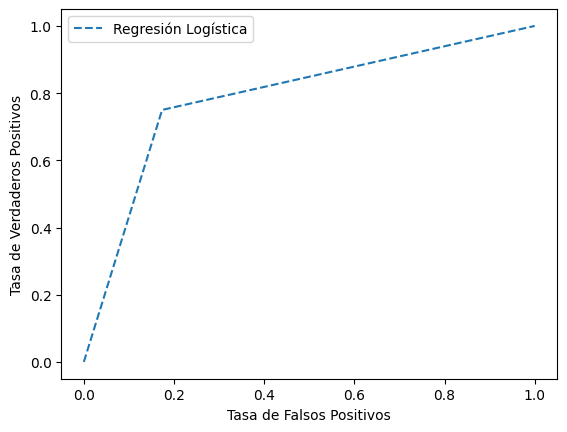

In [4]:
#Importamos

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Calculamos el AUC
ns_auc = roc_auc_score(y_test, y_pred)

# Imprimimos en pantalla
print('Regresión Logística: ROC AUC= %.3f' % (ns_auc))

# Calculamos la curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred)

# Pintamo la curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Regresión Logística')

# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

En tales casos, la **precision** y el **recall** son **mejores medidas para evaluar el rendimiento del modelo**.

La **_Precisión_** mide la proporción de **verdaderos positivos** entre **todas** las **clasificaciones positivas**, mientras que el **_Recall_** mide la proporción de **verdaderos positivos** entre **todas** las **instancias positivas reales**.

Estas medidas pueden ayudar a evitar la **paradoja del falso positivo** y proporcionar una _evaluación más precisa del rendimiento del modelo_.

## **Falacia del jugador**

La falacia del jugador _es la creencia de que los eventos pasados ​​pueden influir en la probabilidad de eventos futuros en un proceso aleatorio_.

Por ejemplo, en un juego de ruleta, algunos jugadores creen que si la bola ha caído en negro durante varios giros consecutivos, las posibilidades de que caiga en rojo la próxima vez son mayores, aunque el resultado sigue siendo igualmente aleatorio.

In [5]:
# Podemos simular lanzar una moneda justa usando numpy

import numpy as np

# Simular lanzar una moneda 10 veces
results = np.random.randint(0, 2, size=10)
print(f"Lanzamiento de monedas: {results}")

# Contar el número de caras o sellos consecutivas
consecutive = 0
for i in range(1, len(results)):
    if results[i] == results[i-1]:
        consecutive += 1
    else:
        consecutive = 0

print()
# Imprime el resultado
if consecutive > 0:
    print(f"Número de vueltas consecutivas: {consecutive + 1}")
else:
    print("Sin vueltas consecutivas")

Lanzamiento de monedas: [0 0 1 1 1 1 0 1 0 1]

Sin vueltas consecutivas


El código simula lanzar una moneda al aire 10 veces y luego cuenta el número de caras o cruces consecutivas.

La **falacia del jugador** _sugeriría que si ha habido varias caras seguidas, es más probable que el próximo lanzamiento sea cruz, y viceversa._

Sin embargo, en realidad, _cada **lanzamiento de la moneda es independiente** y tiene las **mismas posibilidades de salir cara o cruz.**_

Un **ejemplo del mundo real de la falacia del jugador** podría verse en el **mercado de valores**. _Algunos inversores pueden creer que si el valor de una acción ha estado subiendo de forma constante durante varios días, es más probable que caiga pronto, aunque los movimientos del mercado sigan siendo inherentemente impredecibles y estén sujetos a una variedad de factores._

## **La paradoja de Simpson**

La paradoja de Simpson es un fenómeno estadístico que ocurre cuando aparece una _tendencia en un pequeño conjunto de datos_, pero la _tendencia desaparece_ o se _invierte_ cuando el **conjunto de datos se divide en subgrupos**.

Esto puede conducir a **conclusiones incorrectas si los datos no se analizan correctamente**.

Consideremos un ejemplo para entender mejor este fenómeno. _Supongamos que queremos comparar las tasas de admisión de candidatos masculinos y femeninos a una universidad. Tenemos datos para dos departamentos: departamento A y departamento B._

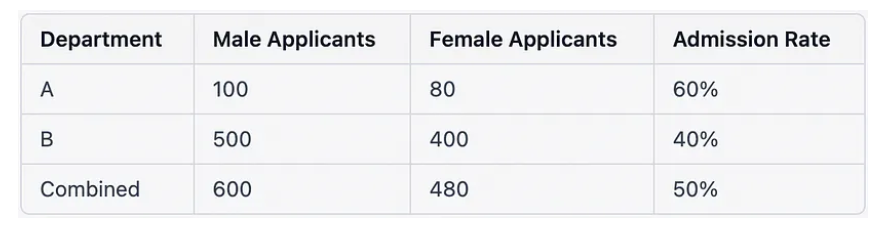

En la tabla anterior, la tasa de admisión combinada para solicitantes masculinos y femeninos es del 50%.

_Sin embargo, cuando analizamos los datos por departamento, vemos que en cada departamento, la tasa de admisión de mujeres es más alta que la tasa de admisión de hombres. Esto parece contrario a la intuición ya que la tasa general de admisión es más alta para los hombres_.

Esta paradoja ocurre porque el **número de postulantes** y las **tasas de admisión** son **diferentes** para cada **departamento**.

* El Departamento **A** tiene una **tasa de admisión más alta en general**, pero un **porcentaje más bajo de mujeres solicitantes**.

* El Departamento **B** tiene una **tasa de admisión más baja en general**, pero un **porcentaje más alto de mujeres solicitantes**.

Creamos un Dataframe con los mismos datos que en la tabla anterior. Luego calculamos las tasas de admisión y mostramos el DataFrame.

In [6]:
import pandas as pd

# Creación de Dataframe
df = pd.DataFrame({'Departamento': ['A', 'A', 'B', 'B'],
                   'Género': ['Masculino', 'Femenino', 'Masculino', 'Femenino'],
                   'Solicitantes': [100, 80, 500, 400],
                   'Aceptados': [60, 40, 40, 70]})

# Calcular porcentaje de admisión
df['Tasa de Admisión'] = df['Aceptados'] / df['Solicitantes'] * 100

# Mostrar el dataframe
print(df)

  Departamento     Género  Solicitantes  Aceptados  Tasa de Admisión
0            A  Masculino           100         60              60.0
1            A   Femenino            80         40              50.0
2            B  Masculino           500         40               8.0
3            B   Femenino           400         70              17.5


In [7]:
# Calcular la tasa de admisión general
overall_rate = df['Aceptados'].sum() / df['Solicitantes'].sum() * 100
print(f"Tasa de admisión general: {overall_rate:.2f}%")
print()

# Calcule las tasas de admisión por departamento y género
department_rates = df.groupby(['Departamento', 'Género'])['Tasa de Admisión'].mean()
print()
print(department_rates)

Tasa de admisión general: 19.44%


Departamento  Género   
A             Femenino     50.0
              Masculino    60.0
B             Femenino     17.5
              Masculino     8.0
Name: Tasa de Admisión, dtype: float64


Calculamos la **tasa de admisión global**, que es del **19,44%**.

Finalmente, agrupamos los _datos_ por **departamento** y **género** ,y calculamos las **tasas de admisión para cada subgrupo**.

Vemos que la **tasa de admisión de mujeres es más alta en ambos departamentos**, aunque la **tasa de admisión general es más alta para los hombres**.

_Este es un ejemplo de la paradoja de Simpson._

## **Paradoja de Berkson**

La paradoja de Berkson es un ¨**fenómeno estadístico** donde aparece una **correlación negativa** entre _dos variables independientes_ o cuando hay una **correlación negativa** _entre dos variables_, pero aparece una **correlación positiva** cuando los _datos_ se **dividen en subgrupos** o si **no existe una correlación real entre ellos**.

_Esta paradoja ocurre cuando ambas variables independientes tienen una influencia o causa común que no está incluida en el análisis._

Para explicar esta paradoja utilizando el conjunto de datos del iris, consideremos la longitud y el ancho del sépalo como las dos variables de interés. Podemos calcular el coeficiente de correlación entre estas dos variables usando el método ```corr()``` en pandas:

In [8]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')

correlation = iris['sepal_length'].corr(iris['sepal_width'])
print('Correlación entre la longitud y el ancho del sépalo:', correlation)


Correlación entre la longitud y el ancho del sépalo: -0.11756978413300208


Como podemos ver, existe una correlación negativa entre la longitud y el ancho del sépalo en el conjunto de datos general.

Sin embargo, si dividimos el conjunto de datos por especie y calculamos el coeficiente de correlación para cada especie por separado, podríamos obtener un resultado diferente. Por ejemplo, si solo consideramos la especie setosa, obtenemos una correlación positiva:

In [9]:
setosa = iris[iris['species'] == 'setosa']
correlation_setosa = setosa['sepal_length'].corr(setosa['sepal_width'])
print('Correlación entre la longitud y el ancho del sépalo, para "setosa":', correlation_setosa)

Correlación entre la longitud y el ancho del sépalo, para "setosa": 0.7425466856651597


_**Esto significa que existe una correlación positiva entre la longitud y el ancho del sépalo para la especie setosa, que es opuesta a la correlación negativa general**._

Esta **paradoja** ocurre porque la especie **setosa** tiene un **rango de valores más pequeño para la longitud y el ancho del sépalo** en _comparación_ con las **otras especies**.

Como resultado, cuando solo consideramos las _especies de setosa_, la **correlación negativa** dentro del _conjunto de datos general_ se ve **eclipsada** por la **correlación positiva** _dentro de las especies de setosa_.

# **Conclusión**

En conclusión, comprender las _paradojas estadísticas es crucial para los científicos de datos_, ya que pueden ayudar a evitar **errores** y **sesgos** comunes en el **análisis de datos**.

* **La paradoja de la Accuracy** nos enseña que la Accuracy por sí sola no es suficiente para evaluar las tareas de clasificación, y la Precisión y el Recall son más informativos.

* **La paradoja de los falsos positivos** destaca la importancia de comprender el costo de los falsos positivos en relación con el costo de los falsos negativos.

* **La falacia del jugador** nos recuerda que cada evento es independiente y que los resultados pasados ​​no afectan los futuros.

* **La paradoja de Simpson** muestra cómo la agregación de datos puede oscurecer las relaciones entre las variables y llevar a conclusiones incorrectas.

* **La paradoja de Berkson** muestra cómo puede ocurrir un sesgo de muestreo cuando se seleccionan muestras no aleatorias de una población.